In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


# <font color="Green" >Tutorial One: Data Collection and Preprocessing</font>

# Confirmed CAses


In [2]:
confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_cases = pd.read_csv(confirmed_cases)
confirmed_cases.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
185,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,26539,28272,29425,30972,32604,33969,35606,37097,38651,40481
131,NaN,India,21.0000,78.0000,0,0,0,0,0,0,...,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794
156,NaN,Mauritania,21.0079,10.9408,0,0,0,0,0,0,...,15,20,29,40,62,81,131,141,173,200
102,NaN,Estonia,58.5953,25.0136,0,0,0,0,0,0,...,1751,1758,1766,1770,1774,1784,1791,1794,1800,1807
73,Shandong,China,36.3427,118.1498,2,6,15,27,46,75,...,788,788,788,788,788,788,788,788,788,788


The record with Province/State = 'Recovered' looks like an anomaly. It's latitude and longitude 0, 0 and located somewhere in the Gulf of Guinea, far far away from Canada. Plus, it has a value of 0 for all the dates. When analysing data, care needs to be taken when tagging something as an anomaly. It could be a very interesting data point. In our case, this record looks way off. We can investigate this using other means; like contacting the admins of the website this data came from. For now, we'll drop such records.


In [3]:
confirmed_cases[confirmed_cases['Province/State'] == 'Recovered']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20


In [4]:
confirmed_cases = confirmed_cases[confirmed_cases['Province/State'] != 'Recovered']

In [5]:
confirmed_cases[confirmed_cases['Country/Region'] == 'Diamond Princess'] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
88,NaN,Diamond Princess,0.0,0.0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712


1. Diamond Princess is within Canada, as seen in the confirmed deaths data. Hence we'll manually adjust this value.
2. the order in which we do this is important. If we change the country first, then on the next filter, we'll have multiple records since canada has multiple provinces.

In [6]:
confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Diamond Princess', 'Province/State'] = 'Diamond Princess'
confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Diamond Princess', 'Country/Region'] = 'Canada'

In [7]:
confirmed_cases.shape

(266, 126)

Confirmed Deaths
==

In [8]:
confirmed_deaths ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
confirmed_deaths = pd.read_csv(confirmed_deaths)
confirmed_deaths.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
226,NaN,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,...,11,11,11,11,12,13,13,13,13,13
192,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,273,283,292,302,312,320,329,339,351,364
206,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,1870,1872,1878,1879,1881,1886,1891,1892,1898,1903
118,NaN,Gambia,13.4432,-15.3101,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
173,NaN,Nigeria,9.0820,8.6753,0,0,0,0,0,0,...,164,167,171,176,182,191,192,200,211,221


In [9]:
confirmed_deaths = confirmed_deaths[confirmed_deaths['Province/State'] != 'Recovered']

In [10]:
confirmed_deaths.shape

(266, 126)

Confirmed Recoveries
== 

In [11]:
confirmed_recovered ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
confirmed_recovered = pd.read_csv(confirmed_recovered)
confirmed_recovered.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
38,NaN,Chad,15.454200,18.732200,0,0,0,0,0,0,...,78,83,88,111,117,117,139,177,186,196
179,NaN,Philippines,13.000000,122.000000,0,0,0,0,0,0,...,2251,2337,2460,2561,2635,2729,2843,2932,3000,3092
231,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,310,310,315,329,335,337,346,346,346,346
81,NaN,Cyprus,35.126400,33.429900,0,0,0,0,0,0,...,449,481,481,515,515,515,515,516,561,561
150,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,412,436,455,479,494,512,529,543,558,560


In [12]:
confirmed_recovered.shape

(253, 126)

'Tidying' our datasets
==

1. Melt data into tidy format
2. We'll fill up all States/Provinces with the Country/State when they are null

In [13]:
df_confirmed = confirmed_cases.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
df_confirmed['Province/State'] = df_confirmed['Province/State'].fillna(df_confirmed['Country/Region'])
df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'])

df_confirmed.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed
22063,MS Zaandam,MS Zaandam,0.0000,0.0000,2020-04-13,9
1956,Denmark,Denmark,56.2639,9.5018,2020-01-29,0
1390,Henan,China,33.8820,113.6140,2020-01-27,128
7165,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-02-17,0
26680,Yunnan,China,24.9740,101.4870,2020-05-01,185


In [14]:
df_confirmed.shape

(32452, 6)

In [15]:
df_deaths = confirmed_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Death')
df_deaths['Province/State'] = df_deaths['Province/State'].fillna(df_deaths['Country/Region'])
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'])

df_deaths.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Death
30539,Ukraine,Ukraine,48.3794,31.1656,2020-05-15,476
24587,Martinique,France,14.6415,-61.0242,2020-04-23,14
19821,Italy,Italy,43.0000,12.0000,2020-04-05,15887
28683,Isle of Man,United Kingdom,54.2361,-4.5481,2020-05-08,23
4142,Madagascar,Madagascar,-18.7669,46.8691,2020-02-06,0


In [16]:
df_deaths.shape

(32452, 6)

In [17]:
df_recovered = confirmed_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')
df_recovered['Province/State'] = df_recovered['Province/State'].fillna(df_recovered['Country/Region'])
df_recovered['Date'] = pd.to_datetime(df_recovered['Date'])

df_recovered.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Recovered
24379,El Salvador,El Salvador,13.7942,-88.8965,2020-04-27,89
1656,Kuwait,Kuwait,29.5000,47.7500,2020-01-28,0
10473,French Polynesia,France,-17.6797,149.4068,2020-03-03,0
22283,Bahrain,Bahrain,26.0275,50.5500,2020-04-19,759
20565,Zhejiang,China,29.1832,120.0934,2020-04-12,1238


1. Combine the 3 datasets into one where we have confirmed cases, deaths and recoveries.
2. We'll use left joins to combine the 3 datasets starting from confirmed. This is because, the confirmed cases ideally holds more recrods than deaths/recovered. So the dataframe with the confirmed cases will be our central dataframe.

In [18]:
df = df_confirmed.merge(df_deaths, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'], how='left')
df = df.merge(df_recovered, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'], how='left')

In [19]:
df.shape

(32452, 8)

In [20]:
df = df.rename(columns={'Province/State': 'Province_State', 'Country/Region': 'Country_Region'})
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Death,Recovered
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0


We have a number of null recovered cases because the number of records in the recovered dataframe were fewer than the confirmed cases

In [21]:
df.isnull().sum().sort_values(ascending=False)

Recovered         3538
Death                0
Confirmed            0
Date                 0
Long                 0
Lat                  0
Country_Region       0
Province_State       0
dtype: int64

In [22]:
df.describe()

,Lat,Long,Confirmed,Death,Recovered
count,32452.000000,32452.000000,3.245200e+04,32452.000000,28914.000000
mean,21.148043,22.538640,5.145314e+03,341.961728,1759.399322
std,24.863506,70.334759,4.566316e+04,3145.993294,11925.333363
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-19.020800,0.000000e+00,0.000000,0.000000
50%,23.488100,20.972650,2.200000e+01,0.000000,2.000000
75%,41.153300,78.000000,4.730000e+02,6.000000,131.000000
max,71.706900,178.065000,1.600937e+06,95979.000000,350135.000000


In [23]:
df.shape

(32452, 8)

In [24]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Death', 'Recovered'],
      dtype='object')

In [25]:
df.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Death                      int64
Recovered                float64
dtype: object

In [26]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Death,Recovered
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0


In [27]:
df_pivot = pd.pivot_table(df, values=['Confirmed', 'Death', 'Recovered'], index=['Country_Region'], 
               aggfunc={'Confirmed': 'max','Death': 'max', 'Recovered':'max'}).reset_index()

df_pivot

,Country_Region,Confirmed,Death,Recovered
0,Afghanistan,9216,205,996.0
1,Albania,981,31,777.0
2,Algeria,7918,582,4256.0
3,Andorra,762,51,652.0
4,Angola,60,3,17.0
...,...,...,...,...
182,West Bank and Gaza,423,2,346.0
183,Western Sahara,6,0,6.0
184,Yemen,209,33,NaN
185,Zambia,920,7,336.0


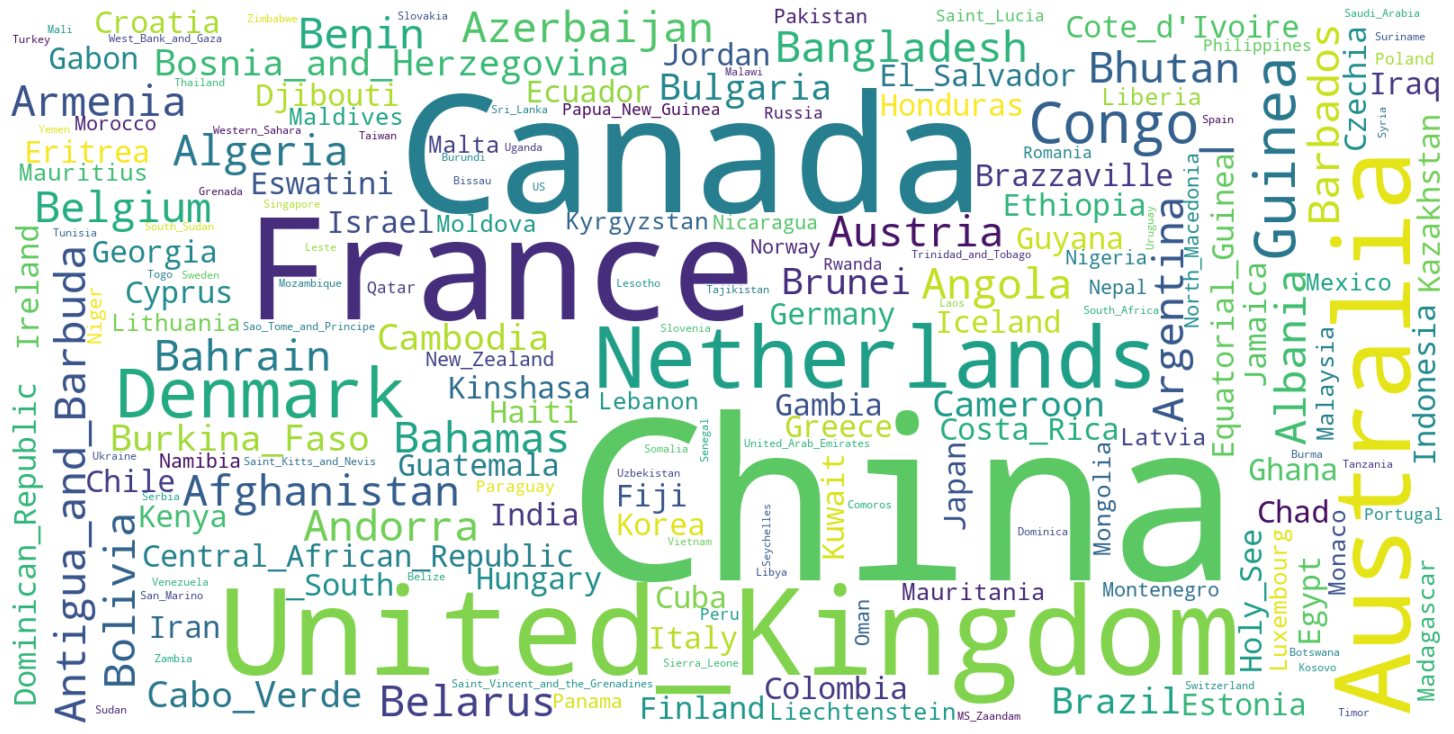

<Figure size 432x288 with 0 Axes>

In [28]:

wc = WordCloud(max_font_size=250,collocations=False, 
                       max_words=1000,width=1600, 
               height=800,background_color="white").generate(' '.join(df['Country_Region'].replace(' ', '_', regex=True)))
plt.figure( figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('Country_Cloud.png')

# Data Cleaning and Preprocessing¶


In [29]:
df['Deaths_to _Confirmed'] = df['Death'] / df['Confirmed']
df['Recovered_to_Confirmed'] = df['Recovered'] / df['Death']

df

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Death,Recovered,Deaths_to _Confirmed,Recovered_to_Confirmed
0,Afghanistan,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0.0,NaN,NaN
1,Albania,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,NaN,NaN
2,Algeria,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,NaN,NaN
3,Andorra,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,NaN,NaN
4,Angola,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32447,Sao Tome and Principe,Sao Tome and Principe,0.186360,6.613081,2020-05-22,251,8,4.0,0.031873,0.5
32448,Yemen,Yemen,15.552727,48.516388,2020-05-22,209,33,NaN,0.157895,NaN
32449,Comoros,Comoros,-11.645500,43.333300,2020-05-22,78,1,18.0,0.012821,18.0
32450,Tajikistan,Tajikistan,38.861034,71.276093,2020-05-22,2551,44,NaN,0.017248,NaN


# <font color="Red" >Tutorial Two: Exploratory Data Analysis (EDA)</font>

# Countries with most reported cases (Till 16 February 2020)


* Massive number of cases are reported in Mainland China Compared to reset of the world
* The next few countries are infact are the neighbours of China


# Number of Countries/Regions to which COVID-19 spread

In [30]:
df['Country_Region'].nunique()

187

# Provinces in China with most reported cases

In [31]:
reported_province_cases = pd.pivot_table(df[(df['Country_Region'] == 'China')], values=['Confirmed'], index=['Province_State'], 
               aggfunc={'Confirmed': 'max'}).reset_index()

(reported_province_cases.sort_values('Confirmed', ascending=False)
.style
.highlight_min(color='lightgreen')
.highlight_max(color='#cd4f39'))

,Province_State,Confirmed
13,Hubei,68135
5,Guangdong,1591
11,Henan,1276
32,Zhejiang,1268
12,Hong Kong,1065
14,Hunan,1019
0,Anhui,991
10,Heilongjiang,945
17,Jiangxi,937
24,Shandong,788


* Even in China most of the cases reported are from a particular Province Hubei.
* It is no surprise, because Hubei's capital is Wuhan, where the the first cases are reported

# Number of Province/State in China to which COVID-19 spread¶


In [32]:
len(reported_province_cases)

33

# Countries with deaths reported¶


In [33]:
countries_reported_death = pd.pivot_table(df, values=['Death'], index=['Country_Region'], 
               aggfunc={'Death': 'max'}).reset_index()

(countries_reported_death.sort_values('Death',ascending=False)
.style
.bar(subset=["Death",], color='#cd4f39')
.highlight_min(color='lightgreen')
)

,Country_Region,Death
173,US,95979
177,United Kingdom,36393
84,Italy,32616
157,Spain,28628
61,France,28193
23,Brazil,21048
16,Belgium,9212
65,Germany,8228
80,Iran,7300
112,Mexico,6989


# Deaths to recovered ratios¶


In [34]:
death_to_recovered = pd.pivot_table(df, values=['Death', 'Recovered'], index=['Country_Region'], 
               aggfunc={'Death': 'max', 'Recovered':'max'}).reset_index()

death_to_recovered.sort_values('Death', ascending=False).style.highlight_max(color='#cd4f39').bar(subset=["Recovered"], color='lightgreen').background_gradient(cmap='Reds')


/home/pdanso/data_science_env/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Country_Region,Death,Recovered
173,US,95979,350135
177,United Kingdom,36393,508
84,Italy,32616,136720
157,Spain,28628,150376
61,France,28193,62216
23,Brazil,21048,135430
16,Belgium,9212,15123
65,Germany,8228,159064
80,Iran,7300,102276
112,Mexico,6989,42191


* The UK is not recording or stopped recording the number of recovered cases hence that number
Overall you can see that, th

# Countries with deaths reported¶


In [35]:
death = pd.pivot_table(df, values=['Death'], index=['Country_Region'], 
               aggfunc={'Death': 'max'}).reset_index()
death.sort_values('Death', ascending=False).style.highlight_max(color='#cd4f39').background_gradient(cmap='Reds')



,Country_Region,Death
173,US,95979
177,United Kingdom,36393
84,Italy,32616
157,Spain,28628
61,France,28193
23,Brazil,21048
16,Belgium,9212
65,Germany,8228
80,Iran,7300
112,Mexico,6989


# Countries with no recovered cases¶


In [36]:
df_pivot[(df_pivot['Recovered'] == 0)].style.highlight_max(color='#cd4f39')

,Country_Region,Confirmed,Death,Recovered
97,Lesotho,2,0,0
103,MS Zaandam,9,2,0


In [37]:
no_recovery = pd.pivot_table(df_pivot[(df_pivot['Recovered'] == 0)], values=['Confirmed', 'Death','Recovered'], index=['Country_Region'], 
               aggfunc={'Recovered': 'sum', 'Confirmed':'sum','Death':'sum'}).reset_index()
no_recovery.style.highlight_max(color='#cd4f39')

,Country_Region,Confirmed,Death,Recovered
0,Lesotho,2,0,0
1,MS Zaandam,9,2,0


# Countries with no affected case anymore¶


In [38]:
df_pivot[(df_pivot['Recovered'] == df_pivot['Confirmed'])]

,Country_Region,Confirmed,Death,Recovered
49,Dominica,16,0,16.0
55,Eritrea,39,0,39.0
131,Papua New Guinea,8,0,8.0
141,Saint Kitts and Nevis,15,0,15.0
142,Saint Lucia,18,0,18.0
149,Seychelles,11,0,11.0
183,Western Sahara,6,0,6.0


In [39]:
no_cases = pd.pivot_table(df_pivot[(df_pivot['Recovered'] == df_pivot['Confirmed'])], values=['Confirmed', 'Death','Recovered'], index=['Country_Region'], 
               aggfunc={'Recovered': 'sum', 'Confirmed':'sum','Death':'sum'}).reset_index()
no_cases.style.highlight_max(color='lightgreen')

,Country_Region,Confirmed,Death,Recovered
0,Dominica,16,0,16
1,Eritrea,39,0,39
2,Papua New Guinea,8,0,8
3,Saint Kitts and Nevis,15,0,15
4,Saint Lucia,18,0,18
5,Seychelles,11,0,11
6,Western Sahara,6,0,6
